# Data Exploration: Phase B Intervention Results

This notebook provides an initial exploration of the intervention experiment results.

**Contents:**
1. Setup and Data Loading
2. Data Overview
3. Data Quality Checks
4. Baseline Performance Analysis
5. Intervention Coverage

## 1. Setup and Data Loading

In [1]:
import sys
sys.path.insert(0, '../..')

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation modules
from evaluation import load_data, metrics, plots

# Set up plotting
plots.setup_style()

# Output directory for figures
OUTPUT_DIR = Path('../outputs')
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

print('Setup complete!')

Setup complete!


In [2]:
# Load data from vm_results
RESULTS_DIR = Path('../../vm_results')

# Load all runs
df = load_data.load_all_runs(RESULTS_DIR)

# Print summary
load_data.print_data_summary(df)

DATA SUMMARY
Total rows: 600
Unique examples: 25
Models: ['Qwen2.5-7B-Instruct']
Datasets: ['mmlu_pro']
Modes: ['add', 'lesion', 'random', 'rescue']
Layers: [25, 26, 27]
Alpha values: [0.0, 0.5, 1.0, 2.0, nan]
Localities: ['cot']


## 2. Data Overview

In [3]:
# Data shape and columns
print(f"DataFrame shape: {df.shape}")
print(f"\nColumns ({len(df.columns)} total):")
for col in sorted(df.columns):
    print(f"  - {col}: {df[col].dtype}")

DataFrame shape: (600, 43)

Columns (43 total):
  - allowed_letters: object
  - alpha: float64
  - baseline_answer_correct: bool
  - baseline_correct_regex: int64
  - baseline_pred_regex: object
  - baseline_reasoning_correct: bool
  - beta: float64
  - dataset: object
  - example_id: object
  - experiment_name: object
  - experiment_type: object
  - gamma: float64
  - gen_ms_base: int64
  - gen_ms_intv: float64
  - gen_ms_lesion: float64
  - gen_ms_rescue: float64
  - gold: object
  - intv_answer_correct: object
  - intv_answer_detected_at: float64
  - intv_correct_regex: float64
  - intv_pred_regex: object
  - intv_reasoning_correct: object
  - layer: int64
  - lesion_answer_correct: object
  - lesion_correct_regex: float64
  - lesion_pred_regex: object
  - lesion_reasoning_correct: object
  - lesion_text_raw: object
  - locality: object
  - mode: object
  - model: object
  - n_gen_tokens_base: int64
  - n_gen_tokens_intv: float64
  - n_gen_tokens_lesion: float64
  - n_gen_tokens_res

In [4]:
# Preview data
df.head(10)

,example_id,task_type,prompt_mode,locality,gold,allowed_letters,baseline_answer_correct,baseline_reasoning_correct,baseline_correct_regex,baseline_pred_regex,...,rescue_answer_correct,rescue_reasoning_correct,rescue_correct_regex,rescue_pred_regex,rescue_text_raw,gen_ms_rescue,n_gen_tokens_rescue,dataset,model,experiment_name
0,mmlu_pro_test_0,mcq,cot,cot,I,"A,B,C,D,E,F,G,H,I",False,True,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mmlu_pro,Qwen2.5-7B-Instruct,Qwen2.5-7B-Instruct__cot_locality_20251201_235957
1,mmlu_pro_test_1,mcq,cot,cot,F,"A,B,C,D,E,F,G,H,I,J",True,False,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mmlu_pro,Qwen2.5-7B-Instruct,Qwen2.5-7B-Instruct__cot_locality_20251201_235957
2,mmlu_pro_test_2,mcq,cot,cot,J,"A,B,C,D,E,F,G,H,I,J",True,True,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mmlu_pro,Qwen2.5-7B-Instruct,Qwen2.5-7B-Instruct__cot_locality_20251201_235957
3,mmlu_pro_test_3,mcq,cot,cot,C,"A,B,C,D,E,F,G,H,I,J",False,True,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mmlu_pro,Qwen2.5-7B-Instruct,Qwen2.5-7B-Instruct__cot_locality_20251201_235957
4,mmlu_pro_test_4,mcq,cot,cot,G,"A,B,C,D,E,F,G,H,I,J",True,True,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mmlu_pro,Qwen2.5-7B-Instruct,Qwen2.5-7B-Instruct__cot_locality_20251201_235957
5,mmlu_pro_test_5,mcq,cot,cot,A,"A,B,C,D,E,F,G,H,I,J",True,True,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mmlu_pro,Qwen2.5-7B-Instruct,Qwen2.5-7B-Instruct__cot_locality_20251201_235957
6,mmlu_pro_test_6,mcq,cot,cot,D,"A,B,C,D,E,F,G,H,I,J",True,True,1,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mmlu_pro,Qwen2.5-7B-Instruct,Qwen2.5-7B-Instruct__cot_locality_20251201_235957
7,mmlu_pro_test_7,mcq,cot,cot,J,"A,B,C,D,E,F,G,H,I,J",True,True,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mmlu_pro,Qwen2.5-7B-Instruct,Qwen2.5-7B-Instruct__cot_locality_20251201_235957
8,mmlu_pro_test_8,mcq,cot,cot,E,"A,B,C,D,E,F,G,H,I,J",False,True,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mmlu_pro,Qwen2.5-7B-Instruct,Qwen2.5-7B-Instruct__cot_locality_20251201_235957
9,mmlu_pro_test_9,mcq,cot,cot,F,"A,B,C,D,E,F,G,H,I,J",True,True,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mmlu_pro,Qwen2.5-7B-Instruct,Qwen2.5-7B-Instruct__cot_locality_20251201_235957


In [5]:
# Unique values for key columns
key_cols = ['model', 'dataset', 'mode', 'layer', 'alpha', 'locality']

print("Unique values for key columns:")
for col in key_cols:
    if col in df.columns:
        values = df[col].unique()
        print(f"\n{col}: {len(values)} unique")
        print(f"  {sorted(values) if len(values) <= 10 else list(sorted(values)[:5]) + ['...'] + list(sorted(values)[-2:])}")

Unique values for key columns:

model: 1 unique
  ['Qwen2.5-7B-Instruct']

dataset: 1 unique
  ['mmlu_pro']

mode: 4 unique
  ['add', 'lesion', 'random', 'rescue']

layer: 3 unique
  [np.int64(25), np.int64(26), np.int64(27)]

alpha: 5 unique
  [np.float64(0.0), np.float64(0.5), np.float64(1.0), np.float64(2.0), np.float64(nan)]

locality: 1 unique
  ['cot']


In [6]:
# Count examples per configuration
group_cols = [c for c in ['model', 'dataset', 'mode', 'layer', 'alpha'] if c in df.columns]
config_counts = df.groupby(group_cols).size().reset_index(name='count')
print(f"Total configurations: {len(config_counts)}")
print(f"\nExamples per configuration:")
print(f"  Min: {config_counts['count'].min()}")
print(f"  Max: {config_counts['count'].max()}")
print(f"  Mean: {config_counts['count'].mean():.1f}")
display(config_counts)

Total configurations: 21

Examples per configuration:
  Min: 25
  Max: 25
  Mean: 25.0


,model,dataset,mode,layer,alpha,count
0,Qwen2.5-7B-Instruct,mmlu_pro,add,25,0.5,25
1,Qwen2.5-7B-Instruct,mmlu_pro,add,25,1.0,25
2,Qwen2.5-7B-Instruct,mmlu_pro,add,25,2.0,25
3,Qwen2.5-7B-Instruct,mmlu_pro,add,26,0.5,25
4,Qwen2.5-7B-Instruct,mmlu_pro,add,26,1.0,25
5,Qwen2.5-7B-Instruct,mmlu_pro,add,26,2.0,25
6,Qwen2.5-7B-Instruct,mmlu_pro,add,27,0.5,25
7,Qwen2.5-7B-Instruct,mmlu_pro,add,27,1.0,25
8,Qwen2.5-7B-Instruct,mmlu_pro,add,27,2.0,25
9,Qwen2.5-7B-Instruct,mmlu_pro,lesion,25,0.0,25


## 3. Data Quality Checks

In [7]:
# Check for missing values
print("Missing values per column:")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'missing': missing, 'pct': missing_pct})
missing_df = missing_df[missing_df['missing'] > 0]

if len(missing_df) > 0:
    display(missing_df)
else:
    print("  No missing values!")

Missing values per column:


,missing,pct
baseline_pred_regex,336,56.00
intv_answer_correct,75,12.50
intv_reasoning_correct,75,12.50
intv_correct_regex,75,12.50
intv_pred_regex,357,59.50
gen_ms_intv,75,12.50
n_gen_tokens_intv,75,12.50
intv_answer_detected_at,241,40.17
alpha,75,12.50
lesion_answer_correct,525,87.50


In [8]:
# Check correctness columns
correct_cols = ['baseline_answer_correct', 'baseline_reasoning_correct', 
                'intv_answer_correct', 'intv_reasoning_correct']

print("Correctness column types and values:")
for col in correct_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"  dtype: {df[col].dtype}")
        print(f"  unique values: {df[col].unique()[:10]}")

Correctness column types and values:

baseline_answer_correct:
  dtype: bool
  unique values: [False  True]

baseline_reasoning_correct:
  dtype: bool
  unique values: [ True False]

intv_answer_correct:
  dtype: object
  unique values: [False True nan]

intv_reasoning_correct:
  dtype: object
  unique values: [True False nan]


In [9]:
# Check for duplicate example IDs within configurations
if 'example_id' in df.columns:
    duplicates = df.groupby(['example_id', 'mode', 'layer', 'alpha']).size().reset_index(name='count')
    duplicates = duplicates[duplicates['count'] > 1]
    
    if len(duplicates) > 0:
        print(f"Warning: {len(duplicates)} duplicate configurations found!")
        display(duplicates.head(10))
    else:
        print("No duplicate example IDs within configurations - good!")

No duplicate example IDs within configurations - good!


## 4. Baseline Performance Analysis

In [10]:
# Overall baseline accuracy
baseline_answer_acc = metrics.compute_baseline_accuracy(df, 'answer')
baseline_reasoning_acc = metrics.compute_baseline_accuracy(df, 'reasoning')

print("Overall Baseline Performance:")
print(f"  Answer Accuracy: {baseline_answer_acc:.1%}")
print(f"  Reasoning Accuracy: {baseline_reasoning_acc:.1%}")

Overall Baseline Performance:
  Answer Accuracy: 51.2%
  Reasoning Accuracy: 82.3%


In [11]:
# Baseline accuracy by dataset
if 'dataset' in df.columns:
    print("Baseline Answer Accuracy by Dataset:")
    for dataset in df['dataset'].unique():
        dataset_df = df[df['dataset'] == dataset]
        acc = metrics.compute_baseline_accuracy(dataset_df, 'answer')
        print(f"  {dataset}: {acc:.1%}")

Baseline Answer Accuracy by Dataset:
  mmlu_pro: 51.2%


In [12]:
# Baseline accuracy by model
if 'model' in df.columns:
    print("Baseline Answer Accuracy by Model:")
    for model in df['model'].unique():
        model_df = df[df['model'] == model]
        acc = metrics.compute_baseline_accuracy(model_df, 'answer')
        print(f"  {model}: {acc:.1%}")

Baseline Answer Accuracy by Model:
  Qwen2.5-7B-Instruct: 51.2%


/Users/washieu/Desktop/MIT/F25/64610_project/nlp_venv/lib/python3.13/site-packages/matplotlib/axes/_axes.py:7132: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


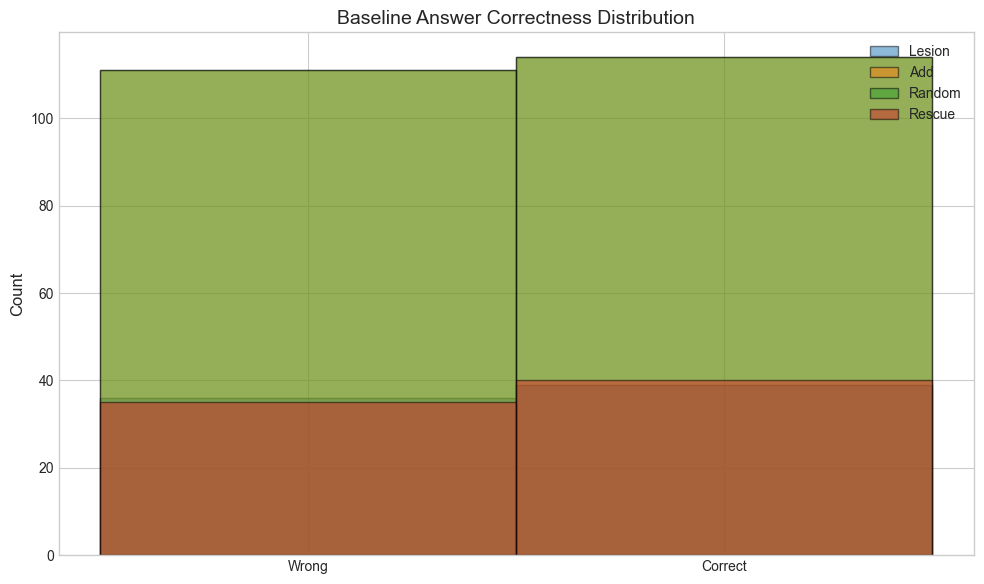

In [13]:
# Visualize baseline accuracy distribution
fig, ax = plt.subplots(figsize=(10, 6))

# Get baseline correct values
if 'baseline_answer_correct' in df.columns:
    baseline_correct = df['baseline_answer_correct'].copy()
    if baseline_correct.dtype == object:
        baseline_correct = baseline_correct.map({'True': 1, 'False': 0, True: 1, False: 0})
    
    # Per-example baseline accuracy by mode
    if 'mode' in df.columns:
        for mode in df['mode'].unique():
            mode_correct = df[df['mode'] == mode]['baseline_answer_correct']
            if mode_correct.dtype == object:
                mode_correct = mode_correct.map({'True': 1, 'False': 0, True: 1, False: 0})
            ax.hist(mode_correct, bins=[-0.5, 0.5, 1.5], alpha=0.5, label=mode.capitalize(), 
                   edgecolor='black')
        ax.legend()
    else:
        ax.hist(baseline_correct, bins=[-0.5, 0.5, 1.5], alpha=0.7, edgecolor='black')
    
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Wrong', 'Correct'])
    ax.set_ylabel('Count')
    ax.set_title('Baseline Answer Correctness Distribution')

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'baseline_distribution.png', dpi=150)
plt.show()

## 5. Intervention Coverage

In [14]:
# Coverage by mode
if 'mode' in df.columns:
    print("Examples by Intervention Mode:")
    mode_counts = df['mode'].value_counts()
    for mode, count in mode_counts.items():
        print(f"  {mode}: {count} ({count/len(df):.1%})")

Examples by Intervention Mode:
  add: 225 (37.5%)
  random: 225 (37.5%)
  lesion: 75 (12.5%)
  rescue: 75 (12.5%)


In [15]:
# Coverage by layer
if 'layer' in df.columns:
    print("Examples by Target Layer:")
    layer_counts = df['layer'].value_counts().sort_index()
    for layer, count in layer_counts.items():
        print(f"  Layer {layer}: {count} ({count/len(df):.1%})")

Examples by Target Layer:
  Layer 25: 200 (33.3%)
  Layer 26: 200 (33.3%)
  Layer 27: 200 (33.3%)


In [16]:
# Coverage by alpha
if 'alpha' in df.columns:
    print("Examples by Alpha Value:")
    alpha_counts = df['alpha'].value_counts().sort_index()
    for alpha, count in alpha_counts.items():
        print(f"  α = {alpha}: {count} ({count/len(df):.1%})")

Examples by Alpha Value:
  α = 0.0: 75 (12.5%)
  α = 0.5: 150 (25.0%)
  α = 1.0: 150 (25.0%)
  α = 2.0: 150 (25.0%)


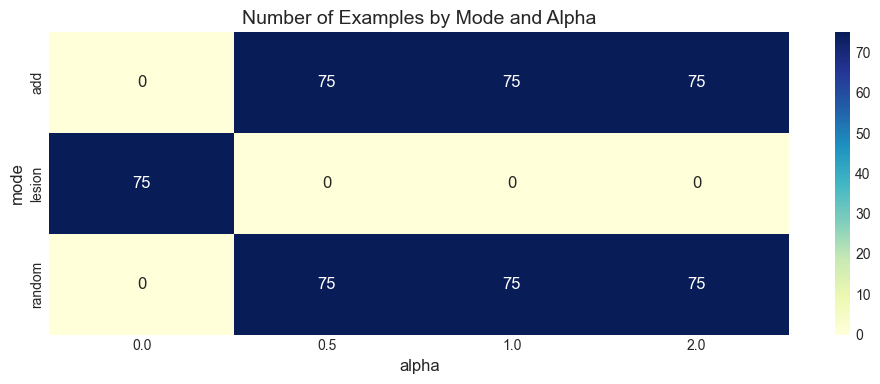

In [17]:
# Heatmap of coverage
if 'mode' in df.columns and 'alpha' in df.columns:
    coverage = df.groupby(['mode', 'alpha']).size().unstack(fill_value=0)
    
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.heatmap(coverage, annot=True, fmt='d', cmap='YlGnBu', ax=ax)
    ax.set_title('Number of Examples by Mode and Alpha')
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / 'coverage_heatmap.png', dpi=150)
    plt.show()

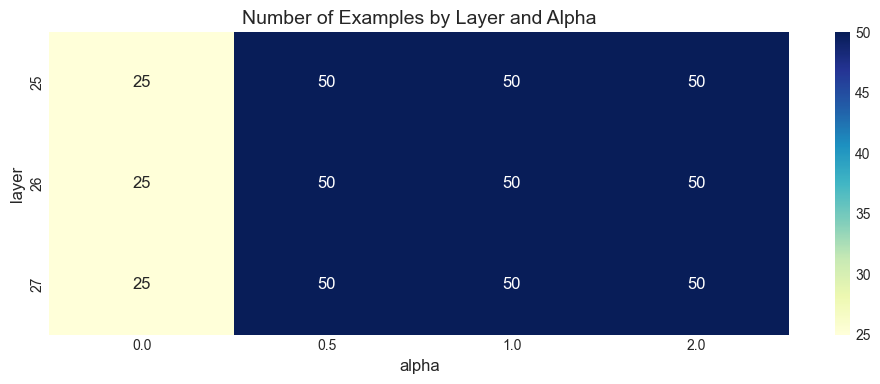

In [18]:
# Coverage by layer and alpha
if 'layer' in df.columns and 'alpha' in df.columns:
    coverage = df.groupby(['layer', 'alpha']).size().unstack(fill_value=0)
    
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.heatmap(coverage, annot=True, fmt='d', cmap='YlGnBu', ax=ax)
    ax.set_title('Number of Examples by Layer and Alpha')
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / 'coverage_layer_alpha.png', dpi=150)
    plt.show()

## Summary

This notebook explored the structure and quality of the intervention experiment data.

**Key observations:**
- Data was loaded from the vm_results directory
- Baseline accuracy provides the reference point for measuring intervention effects
- Coverage shows which configurations have been tested

**Next steps:**
- See `02_intervention_analysis.ipynb` for detailed analysis of intervention effects